# Loading dataset


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/cancerdata.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
df.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave_points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
a = pd.get_dummies(df['diagnosis'], drop_first=True)
a.head()

,M
0,1
1,1
2,1
3,1
4,1


In [ ]:
df1 = pd.concat([df,a], axis=1)
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [ ]:
df1.drop('diagnosis', axis=1, inplace=True)
df1.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


# Applying train test split

In [ ]:
x = df1.drop('M', axis=1)
y = df1['M']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

# Importing Random forest classifier for the classification 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
rf.score(x_test,y_test)

0.9181286549707602

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   4],
       [ 10,  55]])

Text(33.0, 0.5, 'Truth')

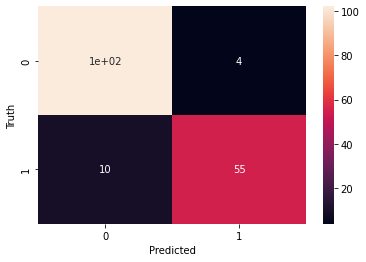

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

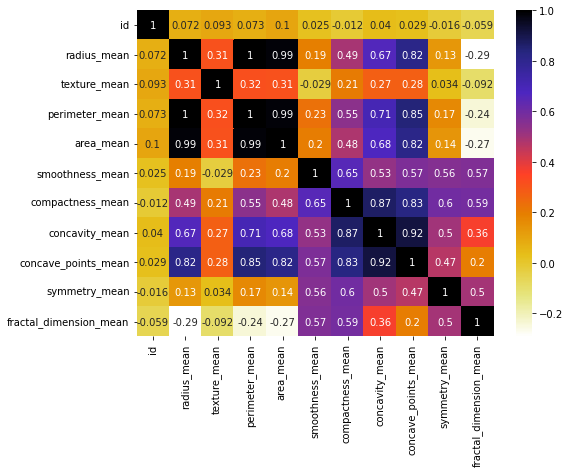

In [ ]:
plt.figure(figsize=(8,6))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# Removing highly correlated features by creating a function

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()  #set of all names of correlated columns , we've created set so that duplicate entries will not go in the set
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]  #getting name of column
        col_corr.add(colname)
  return col_corr

In [ ]:
cor_features = correlation(x_train, 0.7 )
cor_features

{'area_mean', 'concave_points_mean', 'concavity_mean', 'perimeter_mean'}

In [ ]:
x_train.drop(cor_features,axis=1,inplace=True)
x_test.drop(cor_features,axis=1,inplace=True)

In [ ]:
x_train

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean
251,88518501,11.50,18.45,0.09345,0.05991,0.1834,0.05934
77,8610637,18.05,16.15,0.10650,0.21460,0.2152,0.06673
535,919555,20.55,20.86,0.10460,0.17390,0.2127,0.06251
465,9113239,13.24,20.13,0.08284,0.12230,0.1601,0.06432
158,871122,12.06,12.74,0.09311,0.05241,0.1590,0.05907
...,...,...,...,...,...,...,...
411,905520,11.04,16.83,0.10770,0.07804,0.1714,0.06340
84,8612080,12.00,15.65,0.09723,0.07165,0.2079,0.05968
496,914366,12.65,18.17,0.10760,0.13340,0.1641,0.06854
389,90312,19.55,23.21,0.10100,0.13180,0.1989,0.05884


In [ ]:
xnew = df1.drop(cor_features, axis=1)
xnew.head()

,id,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,M
0,842302,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1
1,842517,20.57,17.77,0.08474,0.07864,0.1812,0.05667,1
2,84300903,19.69,21.25,0.10960,0.15990,0.2069,0.05999,1
3,84348301,11.42,20.38,0.14250,0.28390,0.2597,0.09744,1
4,84358402,20.29,14.34,0.10030,0.13280,0.1809,0.05883,1


In [ ]:
from sklearn.model_selection import train_test_split           #extra
x_train,x_test,y_train,y_test = train_test_split(xnew,y, test_size=0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

1.0